In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,QuantileTransformer
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline,FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from scipy.stats import randint
from scipy.special import boxcox

Alright buds we are on the path to reduce the rmse value as much as possible
without logging the label i got an average rmse of 2.3-2.5
reduce this rmse as much as possible
1. with logging the  the label i got the lowest being 1.5 high 3

In [2]:
import pandas as pd

def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Rename column '0.455' to 'Length'
    df = df.rename(columns={'0.455': 'Length'})
    # Rename column 'M' to 'Sex'
    df = df.rename(columns={'M': 'Sex'})
    # Rename column '0.365' to 'Diameter'
    df = df.rename(columns={'0.365': 'Diameter'})
    # Rename column '0.095' to 'Height'
    df = df.rename(columns={'0.095': 'Height'})
    # Rename column '0.514' to 'Weight'
    df = df.rename(columns={'0.514': 'Weight'})
    # Rename column '0.2245' to 'Shucked_weight'
    df = df.rename(columns={'0.2245': 'Shucked_weight'})
    # Rename column '0.101' to 'Viscera_weight'
    df = df.rename(columns={'0.101': 'Viscera_weight'})
    # Rename column '0.15' to 'Shell_weight'
    df = df.rename(columns={'0.15': 'Shell_weight'})
    # Rename column '15' to 'Age'
    df = df.rename(columns={'15': 'Age'})
    return df

# Loaded variable 'df' from URI: f:\Learngin-AIML\Projects\Abalone\abalone.data.csv
df = pd.read_csv(r'f:\Learngin-AIML\Projects\Abalone\abalone.data.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,Sex,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
row_To_drop=df[df_clean['Height']>0.6].index
row_To_drop


Index([2050], dtype='int64')

In [5]:
df_clean.drop(row_To_drop,inplace=True)

In [6]:
df_clean

,Sex,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
y=df_clean[['Age']]

In [8]:
y

,Age
0,7
1,9
2,10
3,7
4,8
...,...
4171,11
4172,10
4173,9
4174,10


In [9]:
X=df_clean.drop("Age",axis=1)

In [10]:
cat_encoder=OneHotEncoder(drop='first',sparse_output=False)
encoded_cat=cat_encoder.fit_transform(X[['Sex']])
encoded_cat=pd.DataFrame(encoded_cat,columns=cat_encoder.get_feature_names_out())
encoded_cat

,Sex_I,Sex_M
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4170,0.0,0.0
4171,0.0,1.0
4172,0.0,1.0
4173,0.0,0.0


In [11]:
X=X.join(encoded_cat)

In [12]:
X.drop('Sex',inplace=True,axis=1)

In [13]:
X

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,1.0
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0


In [14]:
df_clean

,Sex,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
y.skew()

Age    1.114788
dtype: float64

In [16]:
y_log=np.log1p(y)

In [17]:
y.skew()

Age    1.114788
dtype: float64

In [18]:
y_log.skew()

Age   -0.061413
dtype: float64

In [19]:
y

,Age
0,7
1,9
2,10
3,7
4,8
...,...
4171,11
4172,10
4173,9
4174,10


In [20]:
X

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,1.0
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [22]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
y_train

,Age
1272,8
1745,10
2518,7
1281,9
3696,12
...,...
3445,8
466,13
3093,9
3773,9


In [63]:
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0


In [64]:
y_train

,Age
1272,8
1745,10
2518,7
1281,9
3696,12
...,...
3445,8
466,13
3093,9
3773,9


In [65]:
ran_frst=RandomForestRegressor(random_state=42)
model_with_log1p=TransformedTargetRegressor(
    regressor=ran_frst,
    func=np.log1p,
    inverse_func=np.expm1
)

In [66]:
final_scores=-cross_val_score(model_with_log1p,X,y,cv=5,scoring='neg_root_mean_squared_error')
final_scores

array([3.15091941, 1.55879289, 2.36429907, 1.85219963, 1.90335254])

In [28]:
y_train

,Age
1272,8
1745,10
2518,7
1281,9
3696,12
...,...
3445,8
466,13
3093,9
3773,9


In [29]:
ran_rmse=-cross_val_score(ran_frst,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
ran_rmse

array([2.247614  , 2.27763538, 2.23917255, 2.05820986, 2.31603836])

In [31]:
model_with_log1p.fit(X_train,y_train)

,regressor,RandomForestR...ndom_state=42)
,transformer,None
,func,<ufunc 'log1p'>
,inverse_func,<ufunc 'expm1'>
,check_inverse,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [33]:
y_predict=model_with_log1p.predict(X_test)

In [34]:
y_train_log

,Age
1272,8
1745,10
2518,7
1281,9
3696,12
...,...
3445,8
466,13
3093,9
3773,9


In [35]:
y_predict

array([[10.0652482 ],
       [ 9.77815681],
       [ 8.33997415],
       [10.7355492 ],
       [ 9.89799852],
       [11.26738035],
       [10.76929733],
       [ 8.96499681],
       [15.78315866],
       [10.68818401],
       [ 8.35298371],
       [12.85697337],
       [ 8.12600616],
       [10.39559228],
       [10.88752013],
       [16.0745049 ],
       [ 6.84930966],
       [ 5.56833498],
       [ 9.53257964],
       [ 6.09467367],
       [ 7.7320077 ],
       [ 7.55096099],
       [ 7.3111113 ],
       [ 9.93841645],
       [11.17321209],
       [10.38777038],
       [12.30378362],
       [ 9.53146469],
       [ 7.40991751],
       [10.8595936 ],
       [10.27320178],
       [ 8.96426928],
       [ 8.42386745],
       [11.85694425],
       [ 6.71908984],
       [12.20000394],
       [ 7.87856846],
       [10.60926231],
       [ 6.05929199],
       [ 3.64681116],
       [10.38034449],
       [10.72659727],
       [11.78557991],
       [ 7.029694  ],
       [ 7.74941529],
       [ 6

In [36]:
actual_rmse=root_mean_squared_error(y_predict,y_test)
actual_rmse

2.0624349482459854

In [37]:
actual_rmse=mean_absolute_error(y_test,y_predict)
actual_rmse

1.466583472932986

yeh the loggin the labels is effeccient

In [38]:
corr_matrix=df_clean.corr(numeric_only=True)

In [39]:
df_clean

,Sex,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
corr_matrix['Age']

Length            0.557086
Diameter          0.574973
Height            0.603538
Weight            0.540787
Shucked_weight    0.421257
Viscera_weight    0.504232
Shell_weight      0.627992
Age               1.000000
Name: Age, dtype: float64

In [41]:
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
4037,0.550,0.445,0.125,0.672,0.2880,0.1365,0.2100,1.0,0.0
1272,0.475,0.380,0.120,0.441,0.1785,0.0885,0.1505,1.0,0.0
3384,0.475,0.350,0.115,0.487,0.1940,0.1455,0.1250,0.0,0.0
3160,0.335,0.220,0.070,0.170,0.0760,0.0365,0.0500,0.0,0.0
3894,0.595,0.500,0.180,1.053,0.4405,0.1920,0.3900,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3444,0.495,0.400,0.145,0.578,0.2545,0.1305,0.1645,1.0,0.0
466,0.655,0.530,0.195,1.388,0.5670,0.2735,0.4100,0.0,1.0
3092,0.520,0.430,0.150,0.728,0.3020,0.1575,0.2350,0.0,0.0
3772,0.575,0.460,0.150,0.927,0.3330,0.2070,0.2985,0.0,0.0


<Axes: >

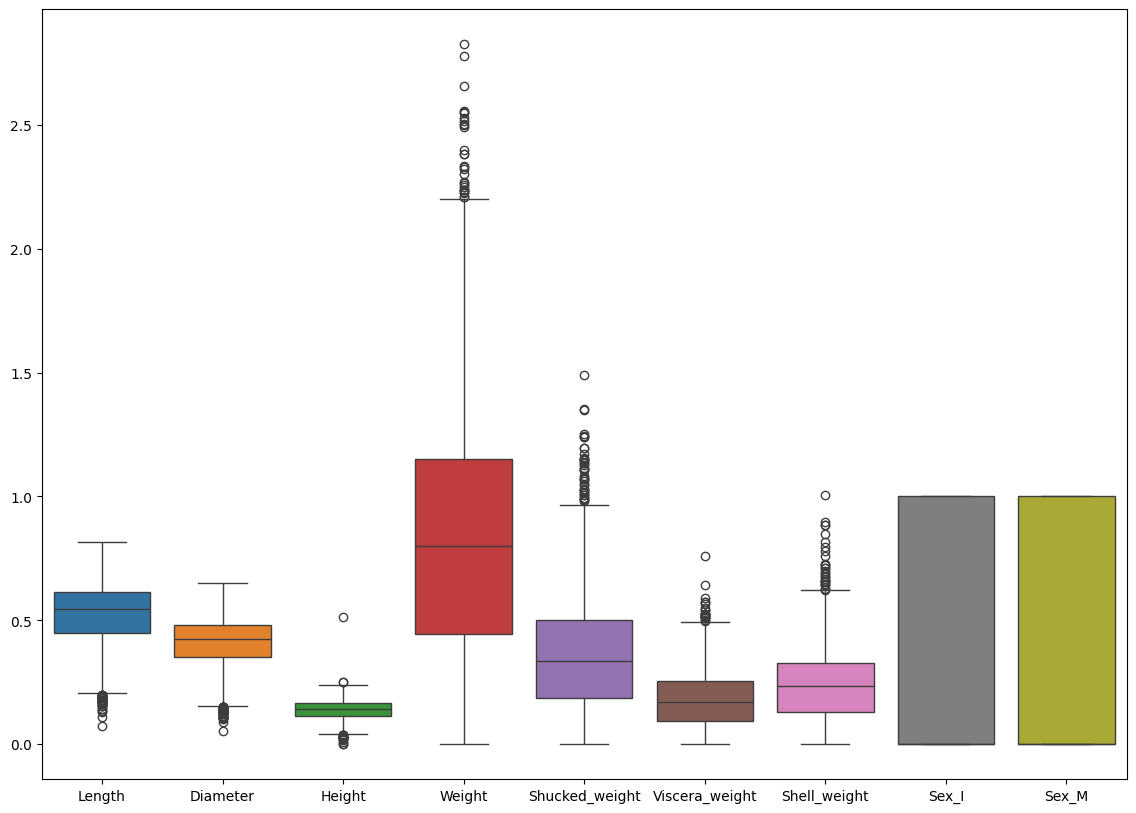

In [41]:
plt.figure(figsize=(14,10))
sns.boxplot(X_train)

In [56]:
encoded_cat

,Sex_I,Sex_M
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4170,0.0,0.0
4171,0.0,1.0
4172,0.0,1.0
4173,0.0,0.0


In [42]:
num_pipeline=make_pipeline(FunctionTransformer(np.log1p,feature_names_out="one-to-one"),StandardScaler())
num_attributes=['Weight','Shucked_weight','Viscera_weight','Shell_weight']

In [43]:
left_num_pipeline=make_pipeline(FunctionTransformer(lambda x:x**0.8,feature_names_out="one-to-one"),StandardScaler())
left_num_attributes=['Length','Diameter','Height']

<Axes: >

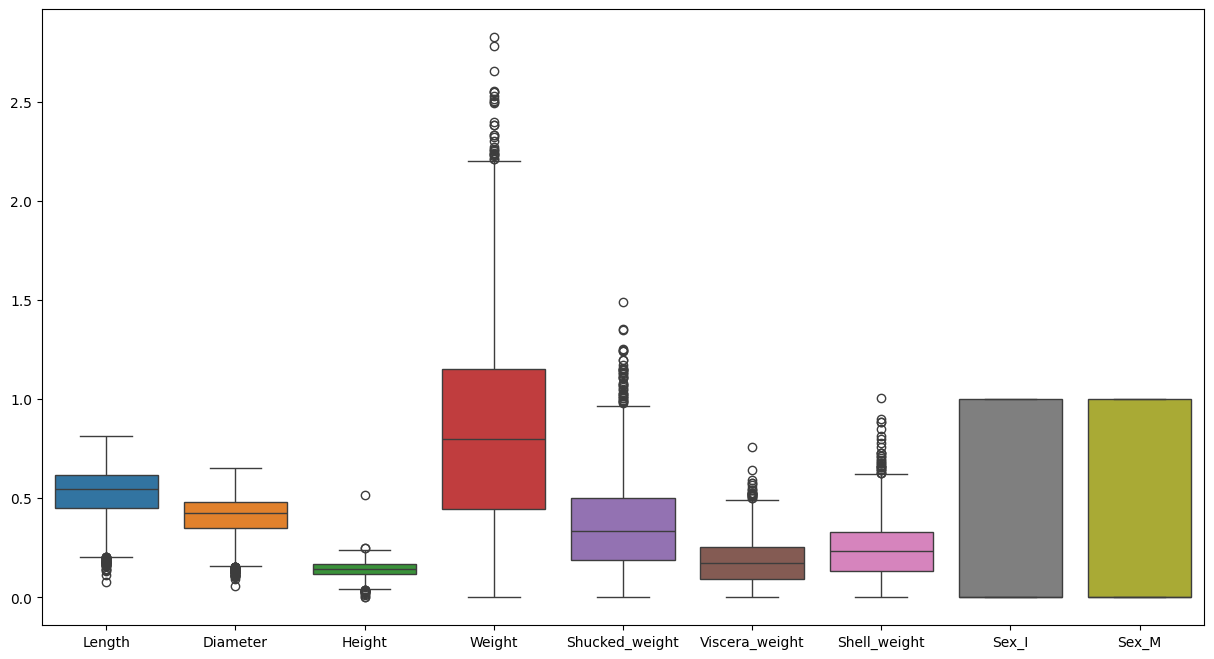

In [44]:
X_train_trans=X_train
plt.figure(figsize=(15,8))
sns.boxplot(X_train_trans)

<Axes: >

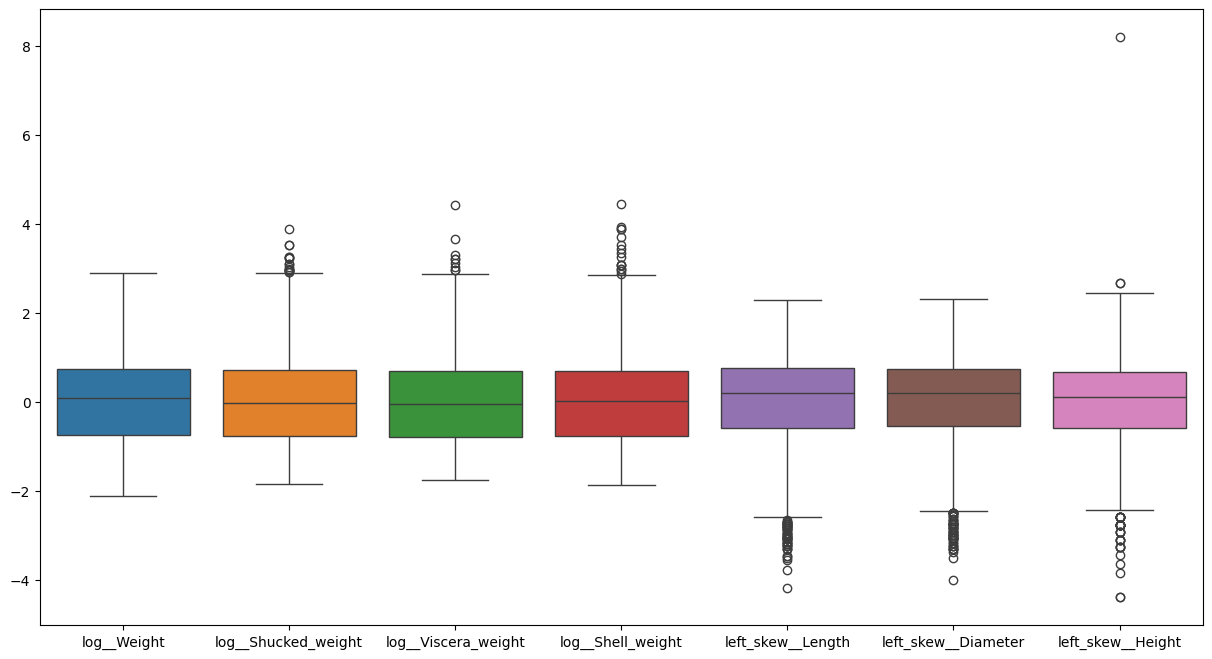

In [67]:
X_train_trans=X_train
preprocessing=ColumnTransformer([
    ("log",num_pipeline,num_attributes),
    ("left_skew",left_num_pipeline,left_num_attributes)
])
X_train_trans=preprocessing.fit_transform(X_train_trans)
X_train_trans=pd.DataFrame(X_train_trans,columns=preprocessing.get_feature_names_out())
X_train_trans


plt.figure(figsize=(15,8))
sns.boxplot(X_train_trans)

In [68]:
X_train_trans=X_train_trans.join(encoded_cat)
X_train_trans

,log__Weight,log__Shucked_weight,log__Viscera_weight,log__Shell_weight,left_skew__Length,left_skew__Diameter,left_skew__Height,Sex_I,Sex_M
0,-0.760636,-0.823184,-0.847307,-0.619561,-0.382363,-0.256891,-0.471686,0.0,1.0
1,1.792783,1.998986,1.858186,2.031128,1.413787,1.519671,0.910972,0.0,0.0
2,-0.341018,-0.367007,-0.321795,-0.451248,-0.134384,-0.157001,1.152217,0.0,1.0
3,-0.195772,-0.195335,-0.326591,-0.187513,-0.175505,0.139666,-0.083939,1.0,0.0
4,0.741180,0.677583,0.243597,1.066777,1.026128,1.005690,0.910972,1.0,0.0
...,...,...,...,...,...,...,...,...,...
3335,-0.379399,-0.197755,-0.692444,-0.615611,-0.175505,-0.206881,-0.735558,1.0,0.0
3336,1.124291,0.971806,0.871908,1.229403,1.065155,1.193817,1.390867,0.0,0.0
3337,-0.319097,-0.374470,-0.273946,-0.358644,0.029295,-0.057621,-0.212181,0.0,0.0
3338,-0.141633,-0.068397,-0.712303,-0.045469,0.473165,0.139666,0.043357,1.0,0.0


In [58]:
X_train_trans

,log__Weight,log__Shucked_weight,log__Viscera_weight,log__Shell_weight,left_skew__Length,left_skew__Diameter,left_skew__Height,Sex_I,Sex_M
0,-0.760636,-0.823184,-0.847307,-0.619561,-0.382363,-0.256891,-0.471686,0.0,1.0
1,1.792783,1.998986,1.858186,2.031128,1.413787,1.519671,0.910972,0.0,0.0
2,-0.341018,-0.367007,-0.321795,-0.451248,-0.134384,-0.157001,1.152217,0.0,1.0
3,-0.195772,-0.195335,-0.326591,-0.187513,-0.175505,0.139666,-0.083939,1.0,0.0
4,0.741180,0.677583,0.243597,1.066777,1.026128,1.005690,0.910972,1.0,0.0
...,...,...,...,...,...,...,...,...,...
3335,-0.379399,-0.197755,-0.692444,-0.615611,-0.175505,-0.206881,-0.735558,1.0,0.0
3336,1.124291,0.971806,0.871908,1.229403,1.065155,1.193817,1.390867,0.0,0.0
3337,-0.319097,-0.374470,-0.273946,-0.358644,0.029295,-0.057621,-0.212181,0.0,0.0
3338,-0.141633,-0.068397,-0.712303,-0.045469,0.473165,0.139666,0.043357,1.0,0.0


In [47]:
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0


<Axes: >

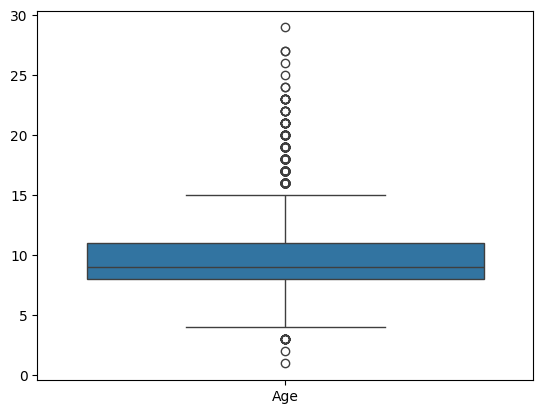

In [46]:
sns.boxplot(y)

<Axes: >

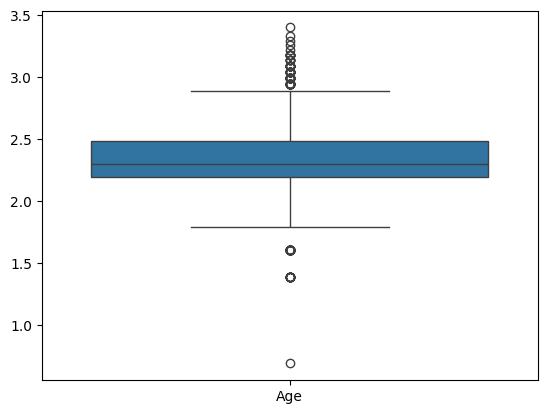

In [113]:
sns.boxplot(np.log1p(y_train))

In [121]:
final_scores=-cross_val_score(model_with_log1p,X_train,np.ravel(y_train),cv=10,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.169273126465403)

In [110]:
final_scores=-cross_val_score(ran_frst,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.1778887050652016)

In [ ]:
final_scores=-cross_val_score(model_with_log1p,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.1800850212070184)

In [109]:
final_scores=-cross_val_score(ran_frst,X_train,np.ravel(y_train),cv=10,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.168928838438424)

In [ ]:
final_scores=-cross_val_score(model_with_log1p,X,np.ravel(y),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.1799736705732036)

In [103]:
final_scores=-cross_val_score(ran_frst,X,np.ravel(y),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.1965948523778516)

Just logging aint doing shit still many outliers
around 2.16-2.18 

In [59]:
final_scores=-cross_val_score(ran_frst,X_train_trans,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores

array([2.22041629, 2.31039376, 2.25367567, 2.04576205, 2.34549964])

In [69]:
final_scores=-cross_val_score(model_with_log1p,X_train_trans,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores

array([2.18096037, 2.28313942, 2.24190795, 2.05161983, 2.35607651])

<Axes: >

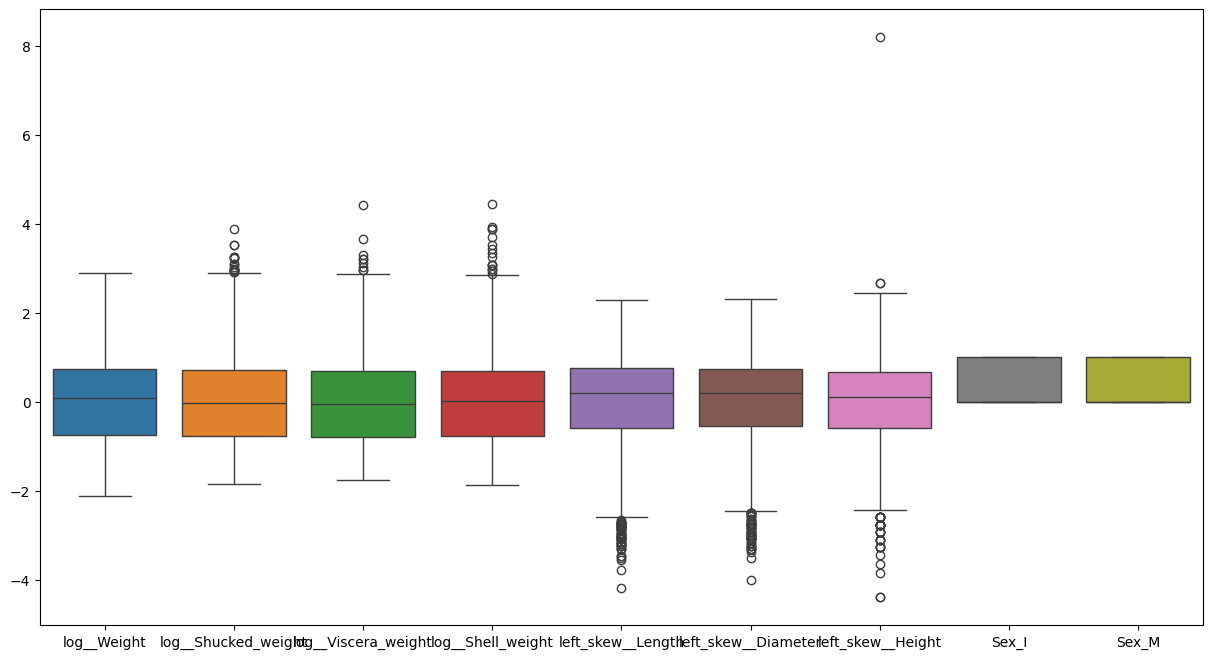

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(X_train_trans)

<Axes: >

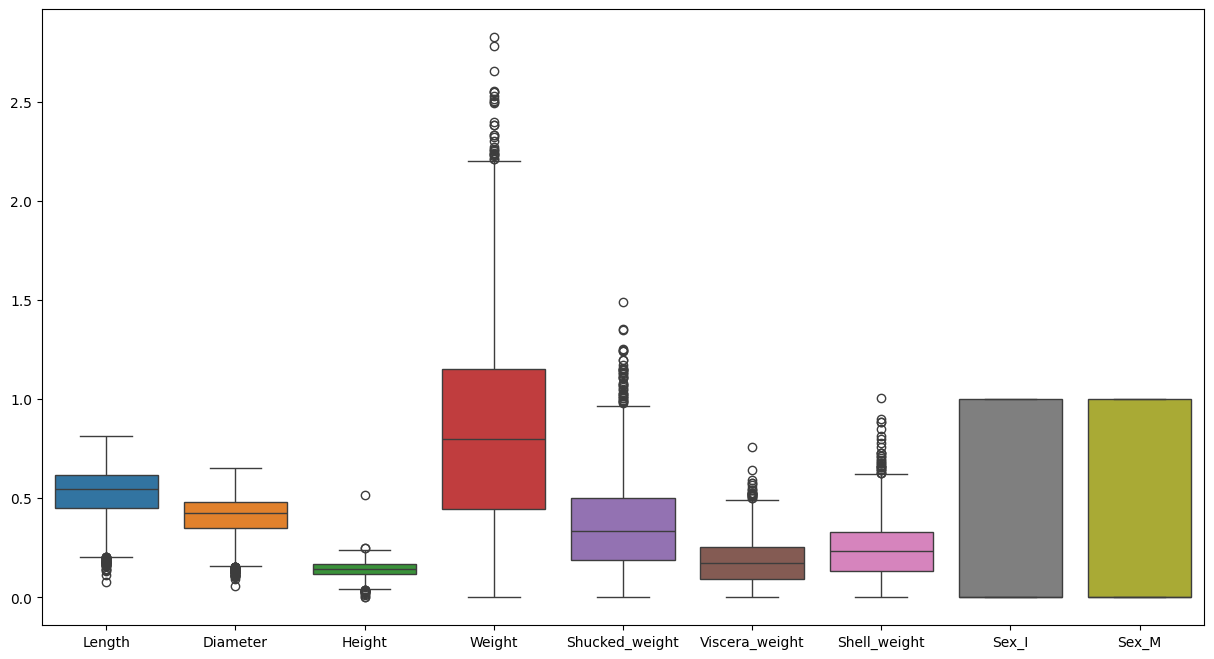

In [62]:
plt.figure(figsize=(15,8))
sns.boxplot(X_train)

In [100]:
y_train

,Age
1272,8
1745,10
2518,7
1281,9
3696,12
...,...
3445,8
466,13
3093,9
3773,9


In [102]:
y_train_log=np.log1p(y_train)
y_train_log

,Age
1272,2.197225
1745,2.397895
2518,2.079442
1281,2.302585
3696,2.564949
...,...
3445,2.197225
466,2.639057
3093,2.302585
3773,2.302585


## Testing other models on X_train_trans

In [74]:
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor,XGBRFRegressor
lin_reg=LinearRegression()
sgd=SGDRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
xgbrf=XGBRFRegressor()

In [263]:
final_scores=-cross_val_score(lin_reg,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.2140143643286327)

In [264]:
final_scores=-cross_val_score(sgd,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.29116753224379)

In [265]:
final_scores=-cross_val_score(gbr,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.216673036125037)

In [266]:
final_scores=-cross_val_score(xgb,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.3527371490265017)

In [267]:
final_scores=-cross_val_score(xgbrf,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.2411549839635634)

In [262]:
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Ratio
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,1.250000
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,1.238938
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,1.294872
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,1.190476
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,1.274510
...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,1.298701
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,1.235849
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,1.312500
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,1.380952


## Dataset

In [ ]:
X_train=X_train.join(y_train)

In [131]:
X_train = X_train.rename(columns={'Age': 'Rings'})
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,rings
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,8
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,10
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,7
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,9
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,8
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,13
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,9
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,9


In [ ]:
y_train=y_train['Age']+1.5

In [ ]:
X_test=X_test.join(y_test)

In [135]:
X_test.drop('Rings',axis=1,inplace=True)

In [136]:
X_test = X_test.rename(columns={'Age': 'rings'})
X_test

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,rings
2331,0.515,0.420,0.135,0.6295,0.2815,0.1270,0.2150,0.0,1.0,10.5
2412,0.505,0.380,0.145,0.6510,0.2935,0.1900,0.1700,1.0,0.0,13.5
2196,0.405,0.305,0.105,0.3625,0.1565,0.0705,0.1250,1.0,0.0,11.5
2382,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,0.0,0.0,17.5
3572,0.595,0.465,0.145,0.7955,0.3425,0.1795,0.2425,0.0,0.0,11.5
...,...,...,...,...,...,...,...,...,...,...
2180,0.535,0.420,0.165,0.9195,0.3355,0.1985,0.2600,0.0,1.0,17.5
2430,0.635,0.500,0.180,1.3120,0.5290,0.2485,0.4850,0.0,0.0,19.5
2632,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030,1.0,0.0,7.5
3463,0.635,0.495,0.155,1.3635,0.5830,0.2985,0.2950,0.0,0.0,11.5


In [127]:
y_test=y_test['Age']+1.5
y_test

2331    10.5
2412    13.5
2196    11.5
2382    17.5
3572    11.5
        ... 
2180    17.5
2430    19.5
2632     7.5
3463    11.5
2391    11.5
Name: Age, Length: 835, dtype: float64

In [139]:
X_train.drop('rings',axis=1,inplace=True)
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0


In [140]:
X_test.drop('rings',axis=1,inplace=True)
X_test

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
2331,0.515,0.420,0.135,0.6295,0.2815,0.1270,0.2150,0.0,1.0
2412,0.505,0.380,0.145,0.6510,0.2935,0.1900,0.1700,1.0,0.0
2196,0.405,0.305,0.105,0.3625,0.1565,0.0705,0.1250,1.0,0.0
2382,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,0.0,0.0
3572,0.595,0.465,0.145,0.7955,0.3425,0.1795,0.2425,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2180,0.535,0.420,0.165,0.9195,0.3355,0.1985,0.2600,0.0,1.0
2430,0.635,0.500,0.180,1.3120,0.5290,0.2485,0.4850,0.0,0.0
2632,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030,1.0,0.0
3463,0.635,0.495,0.155,1.3635,0.5830,0.2985,0.2950,0.0,0.0


In [358]:
X_train['Meat to Shell Ratio'] = X_train['Shucked_weight'] / X_train['Shell_weight']
X_train['Water Loss'] = X_train['Weight'] - X_train['Shucked_weight'] - X_train['Shell_weight']
X_train['BMI'] = X_train['Weight'] / (X_train['Height']**2)
X_train['Length to Diameter Ratio'] = X_train['Length'] / X_train['Diameter']
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Meat to Shell Ratio,Water Loss,BMI,Length to Diameter Ratio
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,1.186047,0.1120,30.625000,1.250000
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,1.563889,0.4720,60.620408,1.238938
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,1.552326,0.1735,17.896275,1.294872
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,1.462470,0.1680,37.119342,1.190476
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,1.287013,0.2745,37.714286,1.274510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,1.996689,0.1435,49.256198,1.298701
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,1.382927,0.4110,36.502301,1.235849
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,1.442935,0.1725,36.804734,1.312500
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,1.456763,0.1470,35.765306,1.380952


In [359]:
X_test['Meat to Shell Ratio'] = X_test['Shucked_weight'] / X_test['Shell_weight']
X_test['Water Loss'] = X_test['Weight'] - X_test['Shucked_weight'] - X_test['Shell_weight']
X_test['BMI'] = X_test['Weight'] / (X_test['Height']**2)
X_test['Length to Diameter Ratio'] = X_test['Length'] / X_test['Diameter']
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.median(), inplace=True)
X_test

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Meat to Shell Ratio,Water Loss,BMI,Length to Diameter Ratio
2331,0.515,0.420,0.135,0.6295,0.2815,0.1270,0.2150,0.0,1.0,1.309302,0.1330,34.540466,1.226190
2412,0.505,0.380,0.145,0.6510,0.2935,0.1900,0.1700,1.0,0.0,1.726471,0.1875,30.963139,1.328947
2196,0.405,0.305,0.105,0.3625,0.1565,0.0705,0.1250,1.0,0.0,1.252000,0.0810,32.879819,1.327869
2382,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,0.0,0.0,1.078571,0.1640,32.949246,1.346154
3572,0.595,0.465,0.145,0.7955,0.3425,0.1795,0.2425,0.0,0.0,1.412371,0.2105,37.835910,1.279570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.535,0.420,0.165,0.9195,0.3355,0.1985,0.2600,0.0,1.0,1.290385,0.3240,33.774105,1.273810
2430,0.635,0.500,0.180,1.3120,0.5290,0.2485,0.4850,0.0,0.0,1.090722,0.2980,40.493827,1.270000
2632,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030,1.0,0.0,1.276699,0.0920,24.688091,1.287879
3463,0.635,0.495,0.155,1.3635,0.5830,0.2985,0.2950,0.0,0.0,1.976271,0.4855,56.753382,1.282828


In [343]:
X_train.drop('Ratio',axis=1,inplace=True)
X_test.drop('Ratio',axis=1,inplace=True)

In [349]:
X_test

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Meat to Shell Ratio,Water Loss,BMI,Length to Diameter Ratio
2331,0.515,0.420,0.135,0.6295,0.2815,0.1270,0.2150,0.0,1.0,1.309302,0.1330,34.540466,1.226190
2412,0.505,0.380,0.145,0.6510,0.2935,0.1900,0.1700,1.0,0.0,1.726471,0.1875,30.963139,1.328947
2196,0.405,0.305,0.105,0.3625,0.1565,0.0705,0.1250,1.0,0.0,1.252000,0.0810,32.879819,1.327869
2382,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,0.0,0.0,1.078571,0.1640,32.949246,1.346154
3572,0.595,0.465,0.145,0.7955,0.3425,0.1795,0.2425,0.0,0.0,1.412371,0.2105,37.835910,1.279570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,0.535,0.420,0.165,0.9195,0.3355,0.1985,0.2600,0.0,1.0,1.290385,0.3240,33.774105,1.273810
2430,0.635,0.500,0.180,1.3120,0.5290,0.2485,0.4850,0.0,0.0,1.090722,0.2980,40.493827,1.270000
2632,0.425,0.330,0.115,0.3265,0.1315,0.0770,0.1030,1.0,0.0,1.276699,0.0920,24.688091,1.287879
3463,0.635,0.495,0.155,1.3635,0.5830,0.2985,0.2950,0.0,0.0,1.976271,0.4855,56.753382,1.282828


In [360]:
total=X_train.join(y_train)
total

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Meat to Shell Ratio,Water Loss,BMI,Length to Diameter Ratio,Age
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,1.186047,0.1120,30.625000,1.250000,9.5
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,1.563889,0.4720,60.620408,1.238938,11.5
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,1.552326,0.1735,17.896275,1.294872,8.5
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,1.462470,0.1680,37.119342,1.190476,10.5
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,1.287013,0.2745,37.714286,1.274510,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,1.996689,0.1435,49.256198,1.298701,9.5
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,1.382927,0.4110,36.502301,1.235849,14.5
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,1.442935,0.1725,36.804734,1.312500,10.5
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,1.456763,0.1470,35.765306,1.380952,10.5


## Random Search

In [293]:
param_distributions={
    'n_estimators': randint(low=100, high=400),
    'max_features':randint(low=2, high=20),
    'max_depth':[int(x) for x in np.linspace(10,110,num=11)]+[None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8,10],
    'bootstrap':[True,False]
}
rf=RandomForestRegressor(random_state=42)
rf_random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=25,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [294]:
rf_random_search.fit(X_train_trans,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END bootstrap=True, max_depth=40, max_features=16, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max_features=16, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max_features=16, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max_features=16, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max_features=16, min_samples_leaf=4, min_samples_split=2, n_estimators=120; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=12, min_samples_leaf=4, min_samples_split=2, n_estimators=199; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=12, min_samples_leaf=4, min_samples_split=2, n_estimators=199; total time=   1.4

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': <scipy.stats....001EFF84FAD50>, 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,25
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
rf_best_params=rf_random_search.best_estimator_
rf_best_params

,n_estimators,266
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [332]:
rf_best_with_log1p=TransformedTargetRegressor(
    regressor=rf_best_params,
    transformer=QuantileTransformer(output_distribution='normal')
)

2.1819881453927663 with logg
2.1767442406675794 without the log

## Transformation

## Prediction testing

In [361]:
total

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Meat to Shell Ratio,Water Loss,BMI,Length to Diameter Ratio,Age
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,1.186047,0.1120,30.625000,1.250000,9.5
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,1.563889,0.4720,60.620408,1.238938,11.5
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,1.552326,0.1735,17.896275,1.294872,8.5
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,1.462470,0.1680,37.119342,1.190476,10.5
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,1.287013,0.2745,37.714286,1.274510,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,1.996689,0.1435,49.256198,1.298701,9.5
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,1.382927,0.4110,36.502301,1.235849,14.5
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,1.442935,0.1725,36.804734,1.312500,10.5
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,1.456763,0.1470,35.765306,1.380952,10.5


In [362]:
corr=total.corr()
corr['Age']

Length                      0.550072
Diameter                    0.566397
Height                      0.599414
Weight                      0.533617
Shucked_weight              0.412163
Viscera_weight              0.496048
Shell_weight                0.622623
Sex_I                      -0.375175
Sex_M                       0.133165
Meat to Shell Ratio        -0.239425
Water Loss                  0.557269
BMI                         0.256399
Length to Diameter Ratio   -0.337570
Age                         1.000000
Name: Age, dtype: float64

In [363]:
final_scores=-cross_val_score(rf_best_params,X_train,np.ravel(y_train),cv=5,scoring='neg_root_mean_squared_error')
final_scores.mean()

np.float64(2.1395282433881393)

In [364]:
ab_rf=rf_best_params.fit(X_train,y_train)
ab_rf

,n_estimators,266
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [365]:
y_test_predictions=ab_rf.predict(X_test)

In [366]:
final_rmse=root_mean_squared_error(y_test,y_test_predictions)
final_rmse

1.9989456290709766

In [342]:
ab_rf.feature_importances_

array([0.02489545, 0.03612453, 0.08285464, 0.06918371, 0.14655668,
       0.04668676, 0.54445831, 0.01242992, 0.00443253, 0.03237746])

In [261]:
X_train

,Length,Diameter,Height,Weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,Ratio
1272,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505,1.0,0.0,1.250000
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0.0,1.0,1.238938
2518,0.505,0.390,0.185,0.6125,0.2670,0.1420,0.1720,0.0,1.0,1.294872
1281,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065,0.0,1.0,1.190476
3696,0.650,0.510,0.175,1.1550,0.4955,0.2025,0.3850,0.0,0.0,1.274510
...,...,...,...,...,...,...,...,...,...,...
3445,0.500,0.385,0.110,0.5960,0.3015,0.1040,0.1510,0.0,0.0,1.298701
466,0.655,0.530,0.195,1.3880,0.5670,0.2735,0.4100,0.0,1.0,1.235849
3093,0.525,0.400,0.130,0.6220,0.2655,0.1470,0.1840,0.0,1.0,1.312500
3773,0.580,0.420,0.140,0.7010,0.3285,0.1020,0.2255,0.0,1.0,1.380952


##### Conclusion
nigga put the rings column inside a training and askign it predict wahh

predcition score without density - 2.0384674784070413
cross val 2.176669019784996

wiht density - 2.0370806997782753
cross val - 2.177101494309612

removed the density wheere length*weighth
added volume length*diameter*height

cross val-2.1794395614041635
predict-2.043242472816421

true density with the above thing *weight
CROSS VAL did worse 2.1804600380074795
predict - 2.0391135950801065

weight/shell weight is abs trash
shell/weight too

better hyperparameters got me
2.0270599526757
2.178526209338037